# Polynomial regression - overfitting and underfitting

In [80]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
samples = 100
X = np.random.uniform(-3,3, (samples,1))
f = lambda x: x**2 + 0.5*x + 3
y = f(X) + np.random.randn(samples,1)

f(X).shape, X.shape

((100, 1), (100, 1))

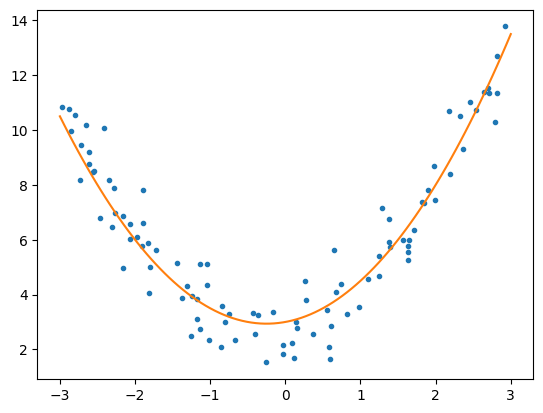

In [81]:
x = np.linspace(-3,3, 100).reshape(100,1)

plt.plot(X, y, '.')
plt.plot(x, f(x))

<Axes: title={'center': '$y = x^2 + 0.5*x + 3 +\\epsilon$'}, xlabel='x', ylabel='y'>

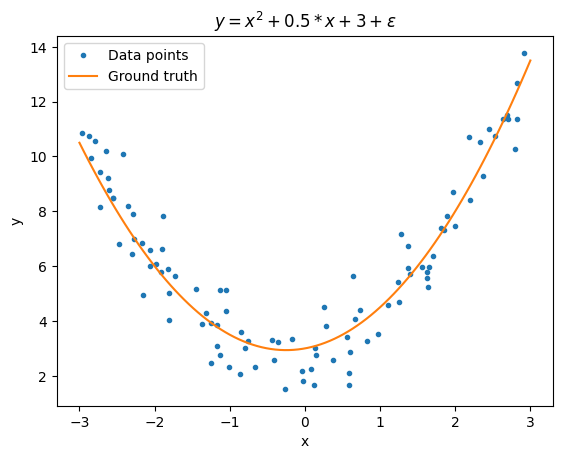

In [82]:
def draw_data():
    fig, ax = plt.figure(), plt.axes()
    ax.plot(X,y, '.', label = "Data points")
    x = np.linspace(-3, 3, samples).reshape(-1,1)

    ax.plot(x, f(x), label = "Ground truth")
    ax.set(title = r"$y = x^2 + 0.5*x + 3 +\epsilon$", xlabel = "x", ylabel = "y")
    ax.legend()

    return ax

draw_data()


## Polynomial regression

### Feature engineering

- constructing features artificially

In [83]:
from sklearn.preprocessing import PolynomialFeatures

poly_instance = PolynomialFeatures(degree = 2, include_bias=False) # include_bias = beta_0?

poly_features = poly_instance.fit_transform(X)
poly_features[:5], X[:5], X[:5]**2

(array([[-0.75275929,  0.56664654],
        [ 2.70428584,  7.3131619 ],
        [ 1.39196365,  1.93756281],
        [ 0.59195091,  0.35040587],
        [-2.06388816,  4.25963433]]),
 array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816]]),
 array([[0.56664654],
        [7.3131619 ],
        [1.93756281],
        [0.35040587],
        [4.25963433]]))

In [84]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_features, y) # trained the model (finding parameters)
model.coef_ # beta_1, beta_2

array([[0.43366893, 1.06456263]])

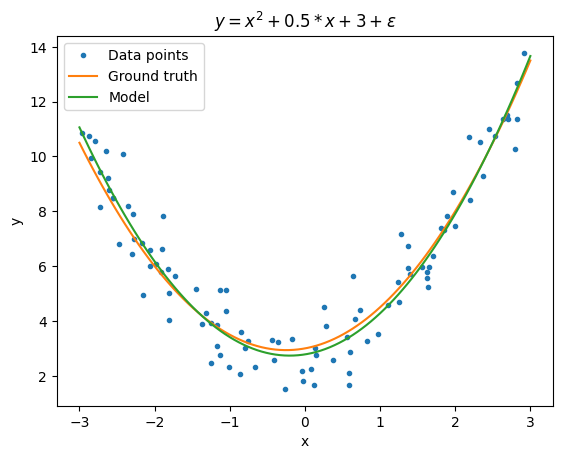

In [85]:
x = np.linspace(-3, 3, samples).reshape(-1,1) # test data
x_poly_features = poly_instance.transform(x)

y_pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, y_pred, label = "Model")
ax.legend()

## Underfitting

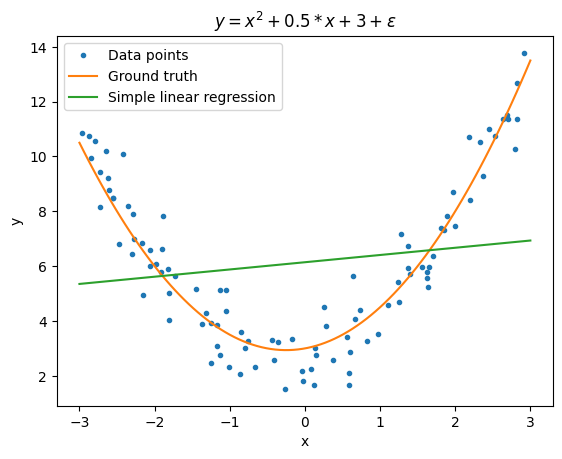

In [92]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(x)

ax = draw_data()
ax.plot(x, y_pred, label = "Simple linear regression")
ax.legend()

## Overfitting

X_features.shape=(100, 30)


[Text(0.5, 1.0, 'Overfitted (model too complex)'), (-5.0, 15.0)]

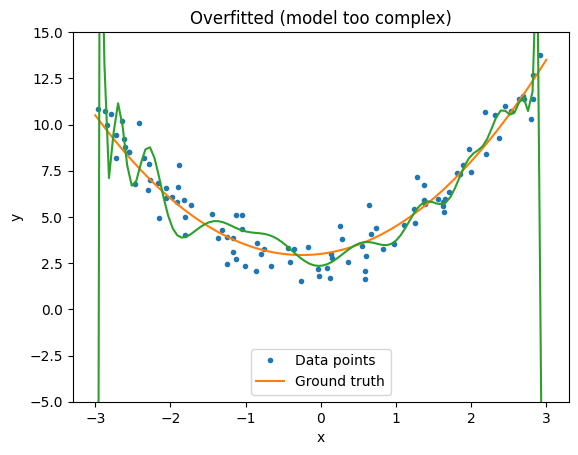

In [102]:
poly_instance = PolynomialFeatures(30, include_bias=False)

X_features = poly_instance.fit_transform(X)

print(f"{X_features.shape=}")

model = LinearRegression()
model.fit(X_features, y)

x_poly_features = poly_instance.transform(x)
y_pred = model.predict(x_poly_features)


ax = draw_data()
ax.plot(x, y_pred)

ax.set(title = "Overfitted (model too complex)", ylim = [-5,15])

## Choose a model

In [103]:
np.random.seed(42)
samples = 10000

X = np.random.uniform(-3,3, (samples,1))
f = lambda x: x**4 + x**2 + 0.5*2 + x + 3
y = f(X) + np.random.randn(samples,1)

X.shape, y.shape

((10000, 1), (10000, 1))

### Train|val|test split

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((6700, 1), (1650, 1), (1650, 1), (6700, 1), (1650, 1), (1650, 1))

### Elbow

In [108]:
from sklearn.metrics import mean_squared_error

RMSE_val = []

for degree in range(1,100):
    # include_bias=False since LinearRegression adds intercept automatically
    model_poly = PolynomialFeatures(degree, include_bias=False)
    train_features = model_poly.fit_transform(X_train) # feature engineering on train data
    val_features = model_poly.transform(X_val) # feature engineering on validation data
    model_linear_regression = LinearRegression()

    model_linear_regression.fit(train_features, y_train)

    y_pred_val = model_linear_regression.predict(val_features)

    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))
    

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

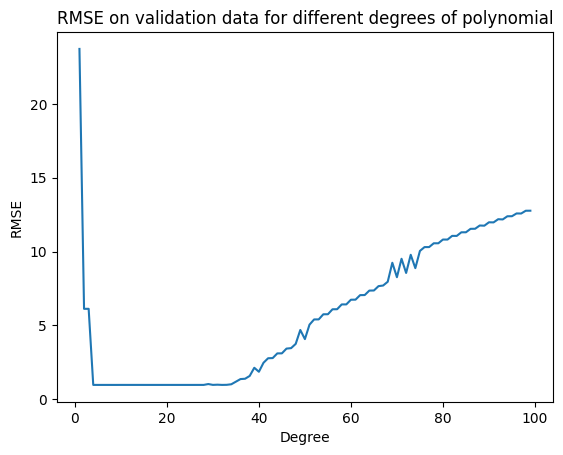

In [125]:
plt.plot(range(1,100), RMSE_val)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

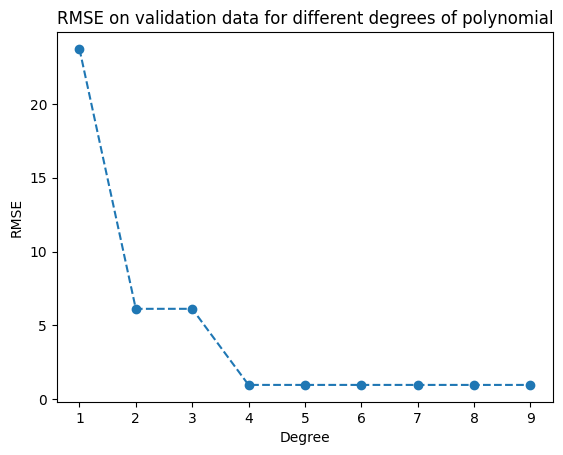

In [126]:
plt.plot(range(1,10), RMSE_val[:9], 'o--')
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")
# plt.ylim([0.9,1])